In [92]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [93]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print(x_train.shape[0])

60000


In [94]:
x_train3 = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
x_test3 = x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)

In [95]:
x_train3.shape

(60000, 28, 28, 1)

In [105]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3),
activation="relu", input_shape=(28, 28, 1)))
model.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3),
activation="relu"))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(rate=0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation="relu"))
model.add(keras.layers.Dropout(rate=0.5))
model.add(keras.layers.Dense(10, activation="softmax"))

In [106]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_23 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 12, 12, 64)       0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_11 (Flatten)        (None, 9216)              0         
                                                                 
 dense_28 (Dense)            (None, 128)               1179776   
                                                     

In [107]:
model.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.Adadelta(learning_rate=1),
metrics='accuracy')

In [117]:
y_train3 = keras.utils.to_categorical(y_train,10)
y_test3 = keras.utils.to_categorical(y_test,10)

In [120]:
history = model.fit(x_train3, y_train3, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
134/469 [=======>......................] - ETA: 34s - loss: 0.0501 - accuracy: 0.9859

KeyboardInterrupt: 

<function matplotlib.pyplot.show(close=None, block=None)>

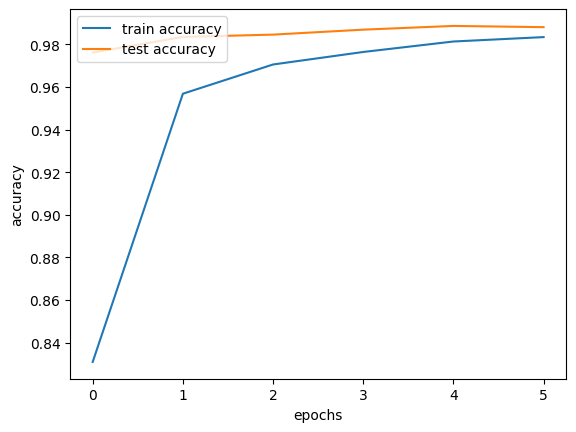

In [112]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train accuracy', 'test accuracy'], loc='upper left')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

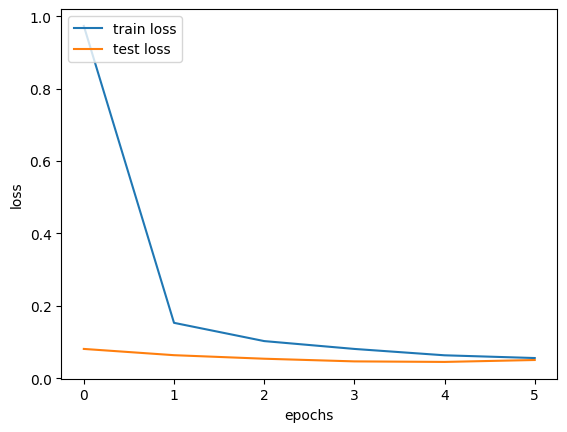

In [113]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train loss', 'test loss'], loc='upper left')
plt.show

In [116]:
loss, accuracy = model.evaluate(x_test3, y_test3, verbose=0)
print(loss, accuracy)

0.04416530579328537 0.9876999855041504
